# Vamos avaliar a alocação de um portfolio composto por 2 ações brasileiras usando a fronteira eficiente de markowitz:

**Importando os módulos necessários:**

In [1]:
import pandas as pd 
from pandas_datareader import data as dt 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline    

**Ativos que utilizaremos para compor o portfólio teórico:**

In [2]:
# Definimos os tickers dos ativos com os quais vamos compor o portfólio: 
assets = ['ABEV3.SA','LREN3.SA']

**Estruturando e importando os dados necessários:**

In [12]:
# Defino o dataframe de dados dos ativos do portfólio: 
data_assets = pd.DataFrame() 

# Importo os dados do yahoo finance:
for i in assets: 
    data_assets[i]=dt.DataReader(i,data_source='yahoo',start='2010-01-01')['Adj Close']
data_assets.dropna(inplace=True)    
# Defino o dataframe de retornos diários de cada ativo:
data_assets_returns = data_assets.pct_change()

**Matriz de covariância:**

In [13]:
data_cov_matrix = data_assets_returns.cov()
data_cov_matrix

,ABEV3.SA,LREN3.SA
ABEV3.SA,0.000289,0.000168
LREN3.SA,0.000168,0.000530


**Matriz de pesos:**

In [14]:
# Como poderemos fazer centenas de combinações destes ativos farei um dataframe com os pesos de cada combinação: 
# Defino o número de combinações que quero analisar:
n = 2000

# Montamos um dataframe com cada combinação: 
assets_rand_weights_df = pd.DataFrame(np.random.rand(len(assets),n),assets,list(range(n))).T
assets_rand_weights_df = assets_rand_weights_df.div( assets_rand_weights_df.sum(axis=1),axis=0)
assets_rand_weights_df

,ABEV3.SA,LREN3.SA
0,0.496753,0.503247
1,0.281198,0.718802
2,0.010131,0.989869
3,0.533375,0.466625
4,0.878188,0.121812
...,...,...
1995,0.212032,0.787968
1996,0.134099,0.865901
1997,0.510827,0.489173
1998,0.407524,0.592476


**Matriz de retornos de cada ativo:** 

In [15]:
assets_returns_matrix = data_assets.iloc[-1].div(data_assets.iloc[0]).add(-1)
assets_returns_matrix

ABEV3.SA    0.738026
LREN3.SA    7.004863
dtype: float64

**Calculando a variância e o retorno de cada portfólio:**

In [16]:
portfolios_variance = []
portfolios_returns = []

for i in assets_rand_weights_df.index:
    portfolio_variance = np.dot(np.dot(np.array(assets_rand_weights_df.loc[i]).T,data_cov_matrix*252),np.array(assets_rand_weights_df.loc[i]))
    portfolio_return = np.dot(np.array(assets_returns_matrix),np.array(assets_rand_weights_df.loc[i]))
    portfolios_variance.append(portfolio_variance)
    portfolios_returns.append(portfolio_return)

# Plotando a fronteira eficiente:

**Vemos que, dada uma determinada alocação, em alguns pontos existirá uma outra alocação que, mesmo tendo proporcionado o mesmo
risco, entregou retornos maiores.**

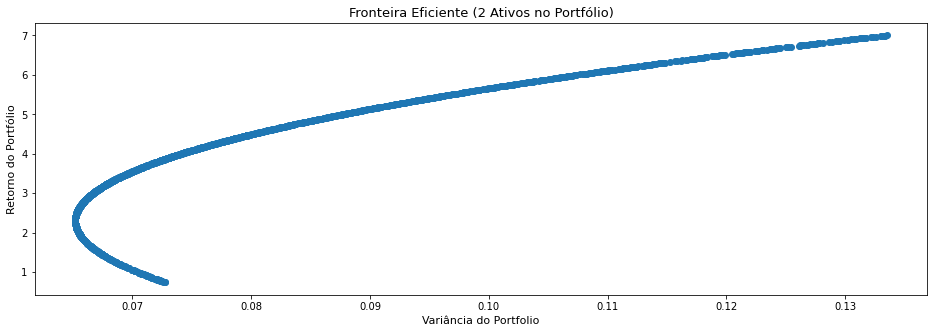

In [17]:
plt.figure(figsize=(16,5))
plt.scatter(portfolios_variance,portfolios_returns)
plt.xlabel('Variância do Portfolio',fontsize=11)
plt.ylabel('Retorno do Portfólio',fontsize=11)
plt.title('Fronteira Eficiente (2 Ativos no Portfólio)',fontsize=13);

# Até aqui fizemos este exercício com 2 ativos, vamos ver o que acontece quando aumentamos o número de ativos que compoem o portfólio:

**Fazendo o mesmo exercício acima mas considerando 5 ações no portfólio:**

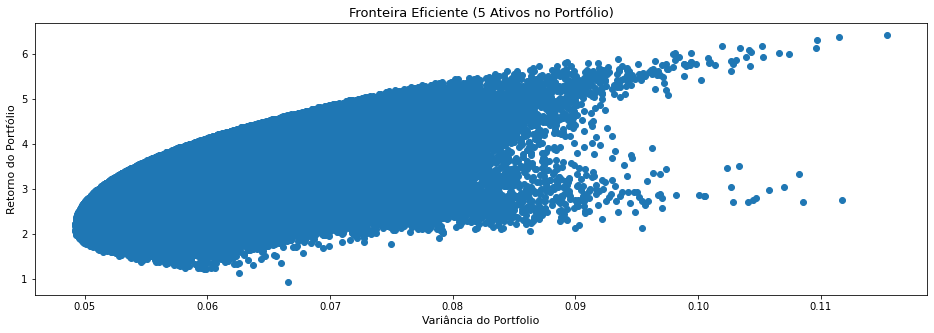

In [57]:
# Definimos os tickers dos ativos com os quais vamos compor o portfólio: 
assets = ['ABEV3.SA','LREN3.SA','CSAN3.SA','ITUB4.SA','PSSA3.SA']

# Defino o dataframe de dados dos ativos do portfólio: 
data_assets = pd.DataFrame() 

# Importo os dados do yahoo finance:
for i in assets: 
    data_assets[i]=dt.DataReader(i,data_source='yahoo',start='2010-01-01')['Adj Close']
data_assets.dropna(inplace=True)
# Defino o dataframe de retornos diários de cada ativo:
data_assets_returns = data_assets.pct_change()

data_cov_matrix = data_assets_returns.cov()
data_cov_matrix

# Como poderemos fazer centenas de combinações destes ativos farei um dataframe com os pesos de cada combinação: 
# Defino o número de combinações que quero analisar:
n = 300000

# Montamos um dataframe com cada combinação: 
assets_rand_weights_df = pd.DataFrame(np.random.rand(len(assets),n),assets,list(range(n))).T
assets_rand_weights_df = assets_rand_weights_df.div( assets_rand_weights_df.sum(axis=1),axis=0)
assets_rand_weights_df

assets_returns_matrix = data_assets.iloc[-1].div(data_assets.iloc[0]).add(-1)
assets_returns_matrix

portfolios_variance = []
portfolios_returns = []

for i in assets_rand_weights_df.index:
    portfolio_variance = np.dot(np.dot(np.array(assets_rand_weights_df.loc[i]).T,data_cov_matrix*252),np.array(assets_rand_weights_df.loc[i]))
    portfolio_return = np.dot(np.array(assets_returns_matrix),np.array(assets_rand_weights_df.loc[i]))
    portfolios_variance.append(portfolio_variance)
    portfolios_returns.append(portfolio_return)

# Plotando a fronteira eficiente:

plt.figure(figsize=(16,5))
plt.scatter(portfolios_variance,portfolios_returns)
plt.xlabel('Variância do Portfolio',fontsize=11)
plt.ylabel('Retorno do Portfólio',fontsize=11)
plt.title('Fronteira Eficiente (5 Ativos no Portfólio)',fontsize=13);

**Vemos novamente o formato de uma fronteira eficiente na borda, portfolios que não se encontram nessa fronteira não são eficientes, para qualquer portfólio que não esteja na fronteira eficiente, sempre existirá uma outra alocação que, mesmo tendo entregado o mesmo nível de risco, entregou retornos maiores:**

### Inserindo Sharpe:

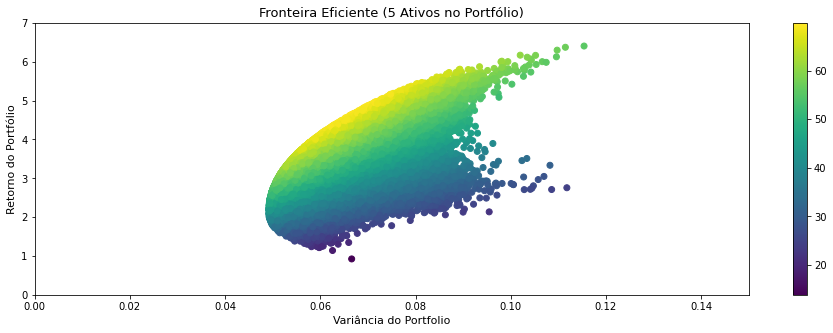

In [58]:
# Assumindo risk free rate = 0% e variância como risco do portfolio (o mais correto seria usar desvio padrão):
portfolios = pd.DataFrame()
portfolios["Variance"] = portfolios_variance
portfolios["Return"] = portfolios_returns
portfolios["Sharpe"] = portfolios["Return"]/portfolios["Variance"]
max_sharpe_index = portfolios.sort_values(by=["Sharpe"]).index[-1]

plt.figure(figsize=(16,5))
plt.scatter(portfolios_variance,portfolios_returns,c = portfolios["Sharpe"],cmap = "viridis")
plt.xlabel('Variância do Portfolio',fontsize=11)
plt.ylabel('Retorno do Portfólio',fontsize=11)
plt.title('Fronteira Eficiente (5 Ativos no Portfólio)',fontsize=13)
plt.axis([0,0.15,0,7])
plt.colorbar();